In [2]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] =  18

In [3]:
ldf_regular = pd.read_csv('./LDF_REGULAR.csv', sep=';')
ldf_optimised = pd.read_csv('./LDF_OPTIMIZED.csv', sep=';')

In [4]:
ldf_regular['mean total CPU'] = ldf_regular['mean cpu usage ldf'] + ldf_regular['mean cpu usage nginx']
ldf_optimised['mean total CPU'] = ldf_optimised['mean cpu usage ldf'] + ldf_optimised['mean cpu usage nginx']
ldf_regular.describe()

,number of clients,mean number of rejected,min number of rejected,max number of rejected,mean execution time,min execution time,max execution time,mean cpu usage ldf,min cpu usage ldf,max cpu usage ldf,...,mean bandwidth ldf,min bandwidth ldf,max bandwidth ldf,mean bandwidth total,min bandwidth total,max bandwidth total,mean number of requests,min number of requests,max number of requests,mean total CPU
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,45.000000,1.000000,1.000000,1.000000,597.373239,597.373239,597.373239,31.368750,31.368750,31.368750,...,3.476590,3.476590,3.476590,15.656816,15.656816,15.656816,6485.705882,6485.705882,6485.705882,35.751471
std,25.248762,1.118034,1.118034,1.118034,142.708696,142.708696,142.708696,15.523479,15.523479,15.523479,...,2.877140,2.877140,2.877140,8.741263,8.741263,8.741263,3617.458030,3617.458030,3617.458030,14.798300
min,5.000000,0.000000,0.000000,0.000000,410.202944,410.202944,410.202944,0.168750,0.168750,0.168750,...,0.059091,0.059091,0.059091,1.929000,1.929000,1.929000,801.000000,801.000000,801.000000,6.475000
25%,25.000000,0.000000,0.000000,0.000000,493.137548,493.137548,493.137548,22.268750,22.268750,22.268750,...,0.813724,0.813724,0.813724,8.761490,8.761490,8.761490,3643.000000,3643.000000,3643.000000,25.237500
50%,45.000000,1.000000,1.000000,1.000000,575.792302,575.792302,575.792302,39.806250,39.806250,39.806250,...,4.198220,4.198220,4.198220,14.885200,14.885200,14.885200,6167.000000,6167.000000,6167.000000,43.268750
75%,65.000000,2.000000,2.000000,2.000000,678.732105,678.732105,678.732105,40.712500,40.712500,40.712500,...,5.802613,5.802613,5.802613,22.858100,22.858100,22.858100,9461.000000,9461.000000,9461.000000,45.243750
max,85.000000,4.000000,4.000000,4.000000,992.494156,992.494156,992.494156,41.250000,41.250000,41.250000,...,8.336050,8.336050,8.336050,30.756400,30.756400,30.756400,12714.000000,12714.000000,12714.000000,47.262500


y = 0.224758x + 25.170177
y = 3.117929x + 457.066423


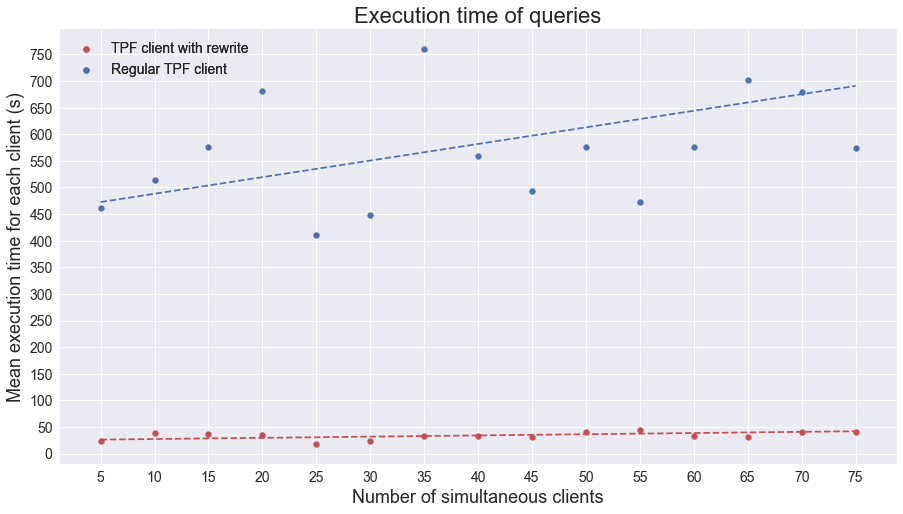

In [5]:
# Plot the mean execution time of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:15].plot(x = 'number of clients', y='mean execution time', figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("Execution time of queries", fontdict=None, fontsize=22)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:15].plot(x = 'number of clients', y = 'mean execution time', ax = ax, kind='scatter', color='b', s=36)
legend1 = plt.legend(["TPF client with rewrite", "Regular TPF client", ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean execution time'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:15]['number of clients'])
ax.plot(ldf_optimised.iloc[0:15]['number of clients'], trendline, '--', color='r')
print("y = %.6fx + %.6f"%(z_optimised[0],z_optimised[1]))

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean execution time'], 1)
f_regular = np.poly1d(z_regular)
print("y = %.6fx + %.6f"%(z_regular[0],z_regular[1]))
trendline = f_regular(ldf_regular.iloc[0:15]['number of clients'])
ax.plot(ldf_regular.iloc[0:15]['number of clients'], trendline, '--', color='b')
#legend2 = plt.legend(["y = %.6f * x + %.6f"%(z_optimised[0],z_optimised[1]), "y = %.6f * x + %.6f"%(z_regular[0],z_regular[1])], loc=4)
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Mean execution time for each client (s)", fontdict=None, labelpad=None, fontsize=18)
#ax.add_artist(legend2)
plt.savefig('execution_time.pdf', bbox_inches='tight')

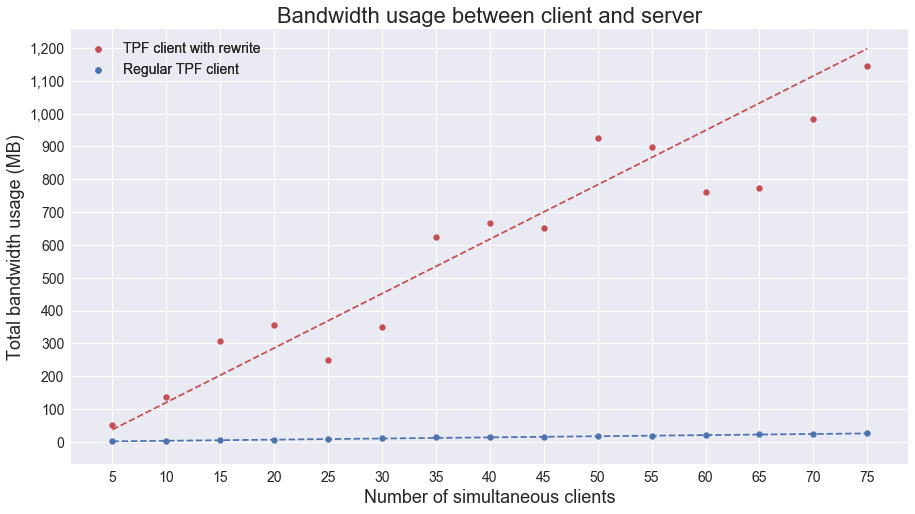

In [6]:
# Plot the mean bandwidth usage of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:15].plot(x = 'number of clients', y='mean bandwidth total', figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("Bandwidth usage between client and server", fontdict=None, fontsize=22)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:15].plot(x = 'number of clients', y='mean bandwidth total', ax=ax, kind='scatter', color='b', s=36)
legend1 = plt.legend(["TPF client with rewrite", "Regular TPF client", ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean bandwidth total'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:15]['number of clients'])
ax.plot(ldf_optimised.iloc[0:15]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean bandwidth total'], 1)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:15]['number of clients'])
ax.plot(ldf_regular.iloc[0:15]['number of clients'], trendline, '--', color='b')
#legend2 = plt.legend(["y = %.6f * x + %.6f"%(z_optimised[0],z_optimised[1]), "y = %.6f * x + %.6f"%(z_regular[0],z_regular[1])], loc=4)
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Total bandwidth usage (MB)", fontdict=None, labelpad=None, fontsize=18)
#ax.add_artist(legend2)
plt.savefig('bandwidth.pdf', bbox_inches='tight')

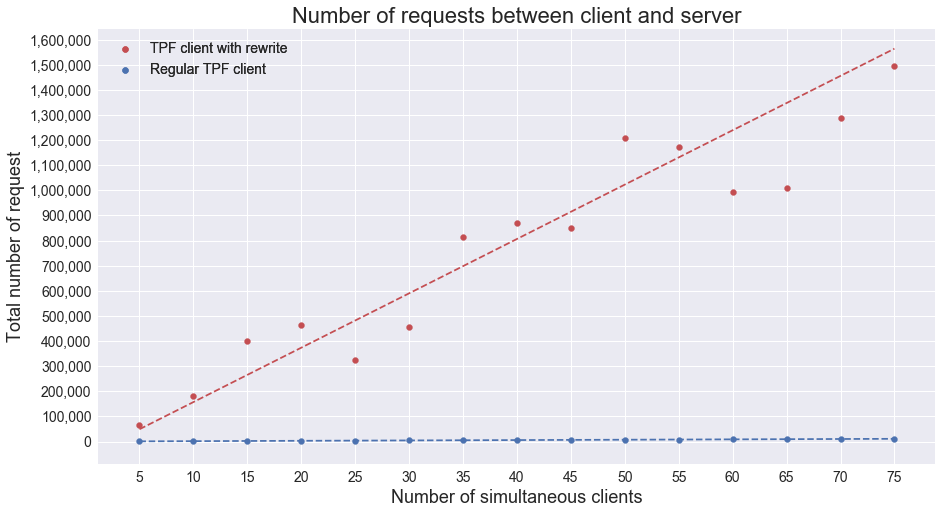

In [7]:
# Plot the mean requests usage of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:15].plot(x = 'number of clients', y='mean number of requests', figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("Number of requests between client and server", fontdict=None, fontsize=22)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:15].plot(x = 'number of clients', y='mean number of requests', ax=ax, kind='scatter', color='b', s=36)
legend1 = plt.legend(["TPF client with rewrite", "Regular TPF client", ], loc=2, prop={'size': 14}) 

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean number of requests'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:15]['number of clients'])
ax.plot(ldf_optimised.iloc[0:15]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean number of requests'], 1)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:15]['number of clients'])
ax.plot(ldf_regular.iloc[0:15]['number of clients'], trendline, '--', color='b')

#legend2 = plt.legend(["y = %.6f * x + %.6f"%(z_optimised[0],z_optimised[1]), "y = %.6f * x + %.6f"%(z_regular[0],z_regular[1])], loc=4)
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Total number of request", fontdict=None, labelpad=None, fontsize=18)
#ax.add_artist(legend2)
plt.savefig('requests.pdf', bbox_inches='tight')

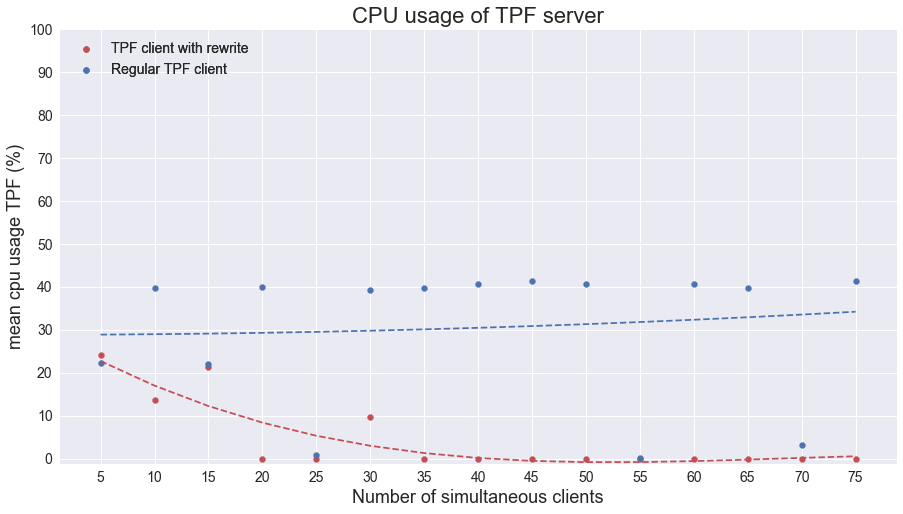

In [67]:
# Plot the mean requests usage of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:15].plot(x = 'number of clients', y='mean cpu usage ldf', figsize=(15, 8), kind='scatter', color='r', s=36, fontsize=14)
ax.set_title("CPU usage of TPF server", fontdict=None, fontsize=22)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("CPU usage (%)", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylim(ymax=100)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:15].plot(x = 'number of clients', y='mean cpu usage ldf', ax=ax, kind='scatter', color='b', s=36)
legend1 = plt.legend(["TPF client with rewrite", "Regular TPF client", ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean cpu usage ldf'], 3)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:15]['number of clients'])
ax.plot(ldf_optimised.iloc[0:15]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean cpu usage ldf'], 2)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:15]['number of clients'])
ax.plot(ldf_regular.iloc[0:15]['number of clients'], trendline, '--', color='b')

#legend2 = plt.legend(["y = %.6f * x + %.6f"%(z_optimised[0],z_optimised[1]), "y = %.6f * x + %.6f"%(z_regular[0],z_regular[1])], loc=4)
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=20)
ax.add_artist(legend1)
#ax.add_artist(legend2)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("mean cpu usage TPF (%)", fontdict=None, labelpad=None, fontsize=18)
plt.savefig('cpu_ldf.pdf', bbox_inches='tight')

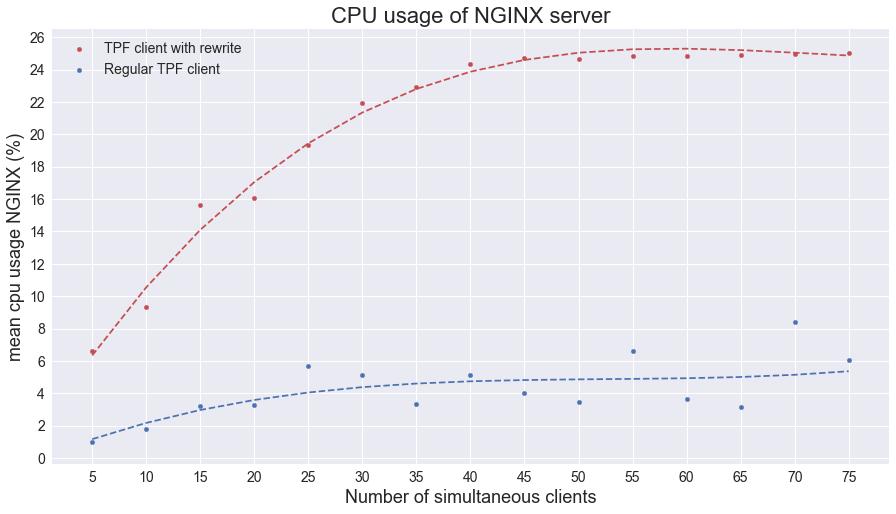

In [68]:
# Plot the mean requests usage of LDF_regular vs LDF_optimised
ax = ldf_optimised.iloc[0:15].plot(x = 'number of clients', y='mean cpu usage nginx', figsize=(15, 8), kind='scatter', color='r', fontsize=14)
ax.set_title("CPU usage of NGINX server", fontdict=None, fontsize=22)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("CPU usage (%)", fontdict=None, labelpad=None, fontsize=18)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:15].plot(x = 'number of clients', y='mean cpu usage nginx', ax=ax, kind='scatter', color='b')
legend1 = plt.legend(["TPF client with rewrite", "Regular TPF client", ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean cpu usage nginx'], 3)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:15]['number of clients'])
ax.plot(ldf_optimised.iloc[0:15]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean cpu usage nginx'], 3)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:15]['number of clients'])
ax.plot(ldf_regular.iloc[0:15]['number of clients'], trendline, '--', color='b')
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=20)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("mean cpu usage NGINX (%)", fontdict=None, labelpad=None, fontsize=18)
plt.savefig('cpu_nginx.pdf', bbox_inches='tight')

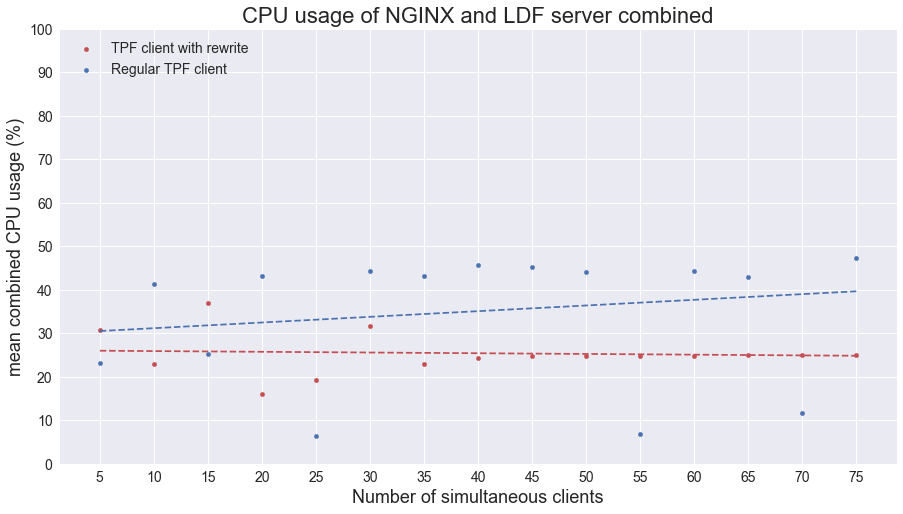

In [69]:
# Plot the total CPU usage (LDF + NGINX)
ax = ldf_optimised.iloc[0:15].plot(x = 'number of clients', y='mean total CPU', figsize=(15, 8),kind='scatter', color='r', fontsize=14)
ax.set_title("CPU usage of NGINX and LDF server combined", fontdict=None, fontsize=22)
ax.set_ylim((0,100))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ldf_regular.iloc[0:15].plot(x = 'number of clients', y='mean total CPU', ax=ax, kind='scatter', color='b')
legend1 = plt.legend(["TPF client with rewrite", "Regular TPF client", ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean total CPU'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:15]['number of clients'])
ax.plot(ldf_optimised.iloc[0:15]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean total CPU'], 1)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:15]['number of clients'])
ax.plot(ldf_regular.iloc[0:15]['number of clients'], trendline, '--', color='b')
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=15)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("mean combined CPU usage (%)", fontdict=None, labelpad=None, fontsize=18)
plt.savefig('cpu_total.pdf', bbox_inches='tight')

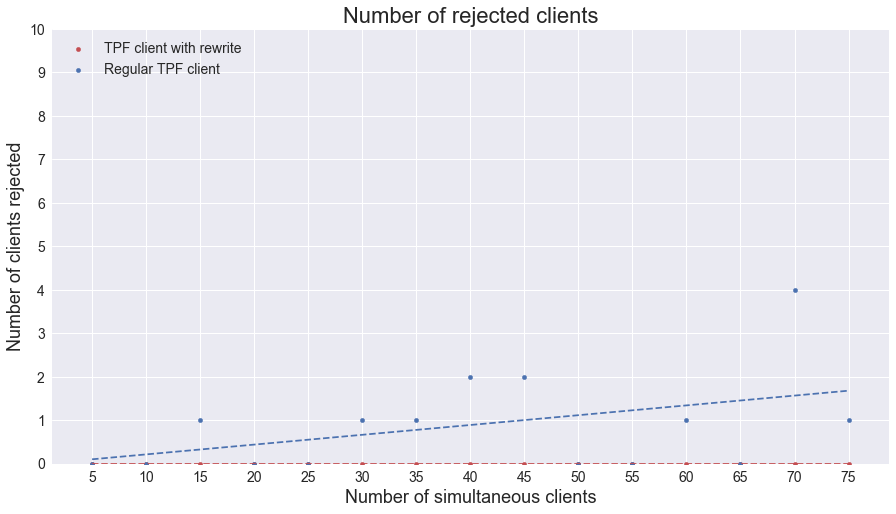

In [9]:
# Plot the rejections (LDF + NGINX)
ax = ldf_optimised.iloc[0:15].plot(x = 'number of clients', y='mean number of rejected', figsize=(15, 8),kind='scatter', color='r', fontsize=14)
ax.set_title("Number of rejected clients", fontdict=None, fontsize=22)

ax.set_yticks(range(0,11))
ax.set_ylim(ymax=10)
ldf_regular.iloc[0:15].plot(x = 'number of clients', y='mean number of rejected', ax=ax,kind='scatter', color='b')
legend1 = plt.legend(["TPF client with rewrite", "Regular TPF client", ], loc=2, prop={'size': 14})

# Create linear trendlines
z_optimised = np.polyfit(ldf_optimised['number of clients'], ldf_optimised['mean number of rejected'], 1)
f_optimised = np.poly1d(z_optimised)

trendline = f_optimised(ldf_optimised.iloc[0:15]['number of clients'])
ax.plot(ldf_optimised.iloc[0:15]['number of clients'], trendline, '--', color='r')

z_regular = np.polyfit(ldf_regular['number of clients'], ldf_regular['mean number of rejected'], 1)
f_regular = np.poly1d(z_regular)

trendline = f_regular(ldf_regular.iloc[0:15]['number of clients'])
ax.plot(ldf_regular.iloc[0:15]['number of clients'], trendline, '--', color='b')
ax.locator_params(axis='x', nbins=20)
ax.locator_params(axis='y', nbins=15)
ax.set_xlabel("Number of simultaneous clients", fontdict=None, labelpad=None, fontsize=18)
ax.set_ylabel("Number of clients rejected", fontdict=None, labelpad=None, fontsize=18)
plt.savefig('rejected.pdf', bbox_inches='tight')